## Random Forest Classifier Model

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [6]:
import numpy as np  # Importing NumPy for loading .npz files

# Load the previously saved train-test split from the .npz file
data = np.load('Dataset/train_test_split.npz')

# Extract the training features
X_train = data['X_train']

# Extract the testing features
X_test = data['X_test']

# Extract the training labels
y_train = data['y_train']

# Extract the testing labels
y_test = data['y_test']

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest model
rfc = RandomForestClassifier()

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict using the test data
rfc_pred = rfc.predict(X_test)

#  Evaluate the model
rfc_accuracy = accuracy_score(rfc_pred, y_test)         # Overall accuracy
rfc_report = classification_report(rfc_pred, y_test)    # Precision, recall, F1-score
rfc_matrix = confusion_matrix(rfc_pred, y_test)         # Confusion matrix

# Display the results
print("✅ Accuracy of RandomForestClassifier:", round(rfc_accuracy, 3))
print("\n Classification Report of RandomForestClassifier:\n", rfc_report)

✅ Accuracy of RandomForestClassifier: 0.985

 Classification Report of RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     12510
           1       0.98      0.98      0.98     19795
           2       1.00      0.97      0.98     12391
           3       1.00      1.00      1.00     15317

    accuracy                           0.99     60013
   macro avg       0.98      0.98      0.98     60013
weighted avg       0.99      0.99      0.99     60013



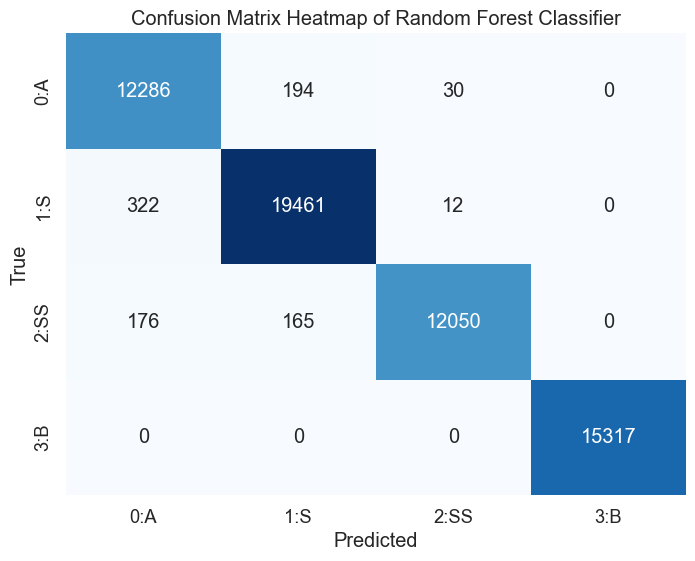

In [8]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(rfc_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS", "3:B"], yticklabels=["0:A", "1:S", "2:SS", "3:B"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap of Random Forest Classifier")
plt.show()

In [9]:
# FP = Total predicted as a class but were actually something else
false_positives_per_class = rfc_matrix.sum(axis=0) - np.diag(rfc_matrix)
rfc_tfp = false_positives_per_class.sum()

print("\n🚨 False Positives Per Class:")
for i, fp in enumerate(false_positives_per_class):
    print(f"  ➤ Class {i} (Label: {'A' if i==0 else 'S' if i==1 else 'SS' if i==2 else 'B'}): {fp}")

print("\n❗ Total False Positives in Model:", rfc_tfp)


🚨 False Positives Per Class:
  ➤ Class 0 (Label: A): 498
  ➤ Class 1 (Label: S): 359
  ➤ Class 2 (Label: SS): 42
  ➤ Class 3 (Label: B): 0

❗ Total False Positives in Model: 899


In [10]:
import joblib

# Save the model
joblib.dump(rfc, 'Model/rfc_model.pkl')

['Model/rfc_model.pkl']